In [27]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

G = 6.67e-11 # (m^3)/(kg * s^2)
AU = 1.495978707 * 10e11 # astronomical unit in meters

In [28]:
class Star():
    def __init__(self,x_pos,y_pos,x_vel,y_vel, mass):
        self.pos = np.array([x_pos,y_pos])*AU # position vector (units in AU)
        self.vel = np.array([x_vel,y_vel]) # velocity vector (units in m/s)
        
        self.x_pos = self.pos[0]
        self.y_pos = self.pos[1]
        self.x_vel = self.vel[0]
        self.y_pos = self.vel[1]
        
        self.mass = mass # star mass (units in kg)

In [29]:
def norm(vector):
    '''Returns normalised vector of a 2-D vector'''
    norm = vector/ sqrt(vector[0]**2 + vector[1]**2)
    return norm

def mag(vector):
    ''' Returns magnitude of a 2-D vector'''
    mag = sqrt(vector[0]**2 + vector[1]**2)
    return mag

In [30]:
star1 = Star(0,0,0,0,2e30)
star2 = Star(1.00269,0,0,36434.5, 0.7e30)

m1 = star1.mass
m2 = star2.mass

r_vect = star2.pos - star1.pos
rdist = sqrt(r_vect[0]**2 + r_vect[1]**2)
M = star1.mass + star2.mass
r1 = m2*rdist/(M)
r2=rdist*(1-m2/M)

Rcom =(m1*star1.pos + m2*star2.pos)/M
star2.p = star2.mass*star2.vel
star1.p = - star2.p


t = 0
dt = 8500

In [31]:
df = pd.DataFrame()

### velocity is not updating

In [32]:

X1_pos = []
Y1_pos = []

X2_pos = []
Y2_pos = []

X1_vel = []
Y1_vel = []

while t < 6*(31.6e6):
    r = star2.pos-star1.pos
    R = mag(r)
    
    F_x = G * (star1.mass*star2.mass/R**2) * (r[0]/R)
    F_y = G * (star1.mass*star2.mass/R**2) * (r[1]/R)
    
    # acceleration at star2
    accel_x = G * (star1.mass/R**2) * (r[0]/R)
    accel_y = G * (star1.mass/R**2) * (r[1]/R)
    
    star2.vel[0] = star2.vel[0] + accel_x
    star2.vel[1]= star2.vel[1] + accel_y
    
    star1.p=star1.p-F2*dt
    star2.p=star2.p+F2*dt
    
    star1.pos = star1.pos + star1.vel*dt
    star2.pos = star2.pos + star2.vel*dt
    
    
    
    
    
    X1_pos.append(star1.pos[0])
    Y1_pos.append(star1.pos[1])
    
    X2_pos.append(star2.pos[0])
    Y2_pos.append(star2.pos[1])
    
    X1_vel.append(star2.vel[0])
    Y1_vel.append(star2.vel[1])
    
#     df['r'] = r
#     df['force'] = F2
#     df['momentum1'] = star1.p
#     df['momentum2'] = star2.p
#     df['position1'] = star1.pos
#     df['position2'] = star2.pos
    
    
    t += dt
    
    

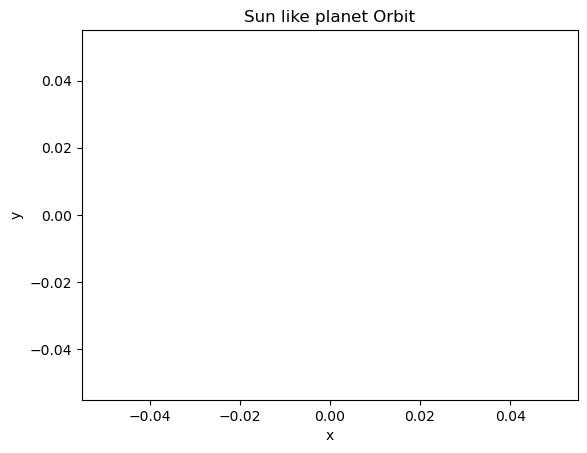

In [33]:
plt.plot(X1_pos, Y1_pos)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sun like planet Orbit')
plt.savefig('plot1.png')

plt.show()

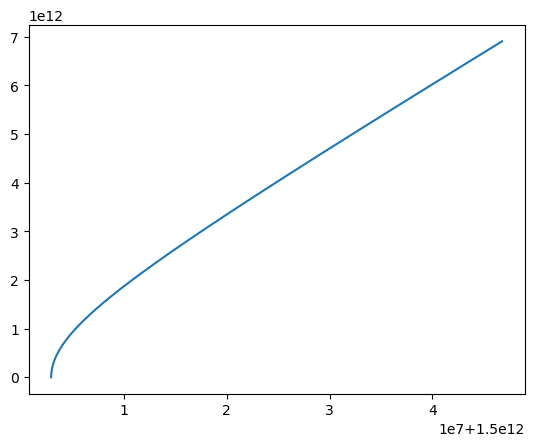

In [34]:
plt.plot(X2_pos, Y2_pos)
plt.show()